In [1]:
#NOTE: this notebook does not run in binder, since the data is not yet available online
import os
import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
import dfm_tools as dfmt
import hydrolib.core.dflowfm as hcdfm

dir_testinput = r'c:\DATA\dfm_tools_testdata'

C:\Users\veenstra\Anaconda3\envs\dfm_tools_env\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


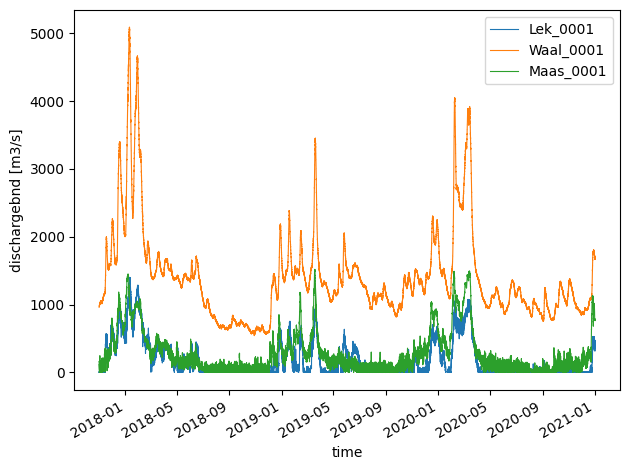

In [2]:
#Load .bc-file using HydroLib object ForcingModel.
file_bc = r'p:\11208053-004-kpp2022-rmm1d2d\C_Work\09_Validatie2018_2020\dflowfm2d-rmm_vzm-j19_6-v2d\boundary_conditions\rmm_rivdis_meas_20171101_20210102_MET.bc'
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, ax = plt.subplots()
for iFO, forcingobj in enumerate(forcingmodel_object.forcing): #loop over three timeseries in bcfile/ForingModel
    forcing_xr = dfmt.forcinglike_to_Dataset(forcingobj, convertnan=True)
    forcing_xr['dischargebnd'].plot(ax=ax, label=forcing_xr['dischargebnd'].attrs['name'], linewidth=0.8)
ax.legend(loc=1)
fig.tight_layout()


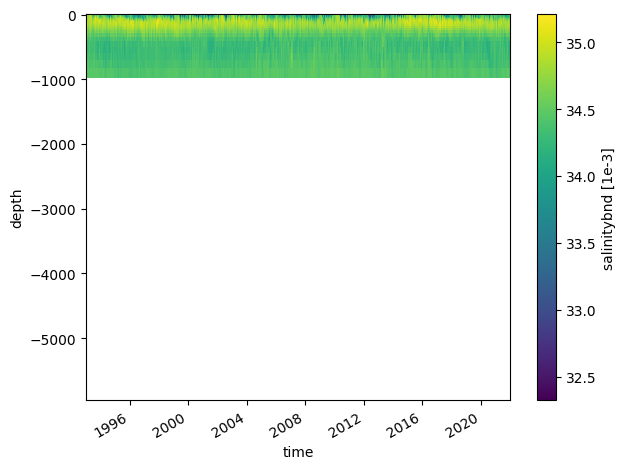

In [3]:
#Load .bc-file using HydroLib object ForcingModel.
file_bc = os.path.join(dir_testinput,r'hydrolib_bc\haixia\salinity_bc_South_v2_firstpoint.bc')
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, ax = plt.subplots()
forcing_xr = dfmt.forcinglike_to_Dataset(forcingmodel_object.forcing[0], convertnan=True)
forcing_xr['salinitybnd'].T.plot(ax=ax)
fig.tight_layout()


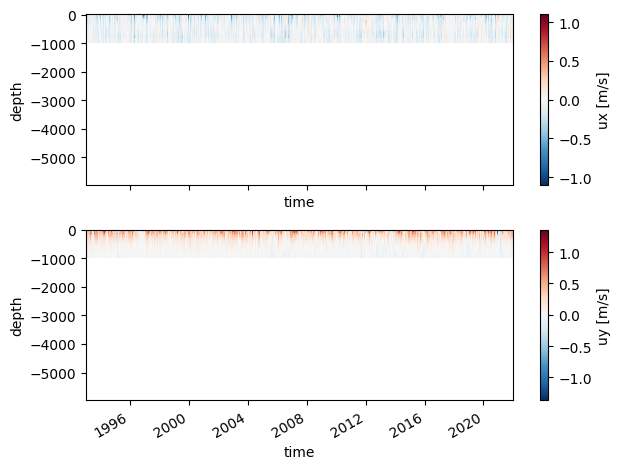

In [4]:
#Load .bc-file using HydroLib object ForcingModel.
file_bc = os.path.join(dir_testinput,r'hydrolib_bc\haixia\uxuy_bc_South_v2_firstpoint.bc')
forcingmodel_object = hcdfm.ForcingModel(file_bc)

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=True)
forcing_xr = dfmt.forcinglike_to_Dataset(forcingmodel_object.forcing[0], convertnan=True)
forcing_xr['ux'].T.plot(ax=ax1)
forcing_xr['uy'].T.plot(ax=ax2)
fig.tight_layout()


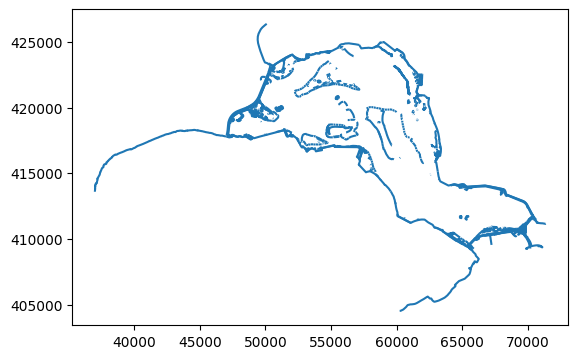

In [5]:
#load pol/pli/ldb file WITH HYDROLIB-core
file_pli = os.path.join(dir_testinput,'DFM_grevelingen_3D','Grevelingen-FM_BL_fxw.pliz')
polyfile_object = hcdfm.PolyFile(file_pli)
gdf_polyfile = dfmt.PolyFile_to_geodataframe_linestrings(polyfile_object,crs='EPSG:28992')
ax = gdf_polyfile.plot()


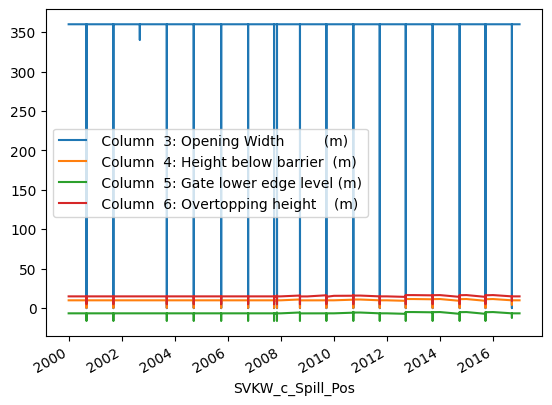

In [6]:
#load tekal file WITH HYDROLIB-core
file_pli = os.path.join(dir_testinput,r'Maeslant.tek')
polyfile_object = hcdfm.PolyFile(file_pli)
polyobject_pd = dfmt.tekalobject_to_DataFrame(polyfile_object.objects[0])
ax = polyobject_pd.plot()


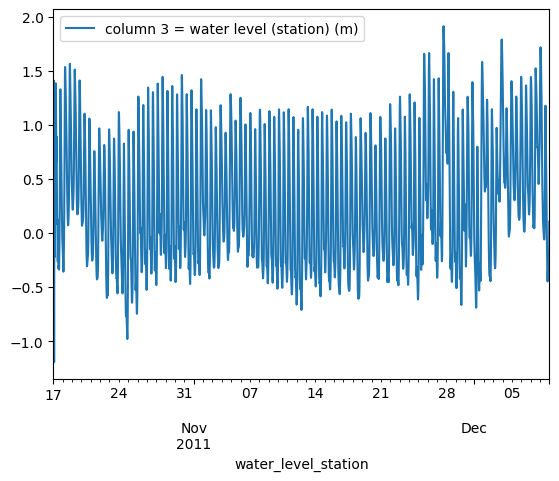

In [7]:
#load tekal file WITH HYDROLIB-core
file_pli = os.path.join(dir_testinput,'nima-1013-lo-wl_validname.tek')
polyfile_object = hcdfm.PolyFile(file_pli)
polyobject_pd = dfmt.tekalobject_to_DataFrame(polyfile_object.objects[0])
ax = polyobject_pd.plot()
